# Exploratory Data Analysis

We will start by gaining first insight into the compensation distribution and job satisfaction for the participants of the survey, then we will explore how the data is distributed according to age, remote work and other features.

In [1]:
#Import relevant libraries

import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

mpl.style.use('ggplot')  # optional: for ggplot-like style

# Load cleaned dataset

df = pd.read_csv("survey-data_cleaned.csv",keep_default_na= False)

## Normalisation, Distribution of Compensation value and its correlation with other key variables

We use two methods of normalisation of the data, the min-max scaling and the Z-score nornalisation for the columns CompTotaL and ConvertedCompYearly. In the following cell we will perform this task for the latter column and then we will proceed with the former.

In [2]:
min = df["ConvertedCompYearly"].min()
max = df["ConvertedCompYearly"].max()
mean = df["ConvertedCompYearly"].mean()
std = df["ConvertedCompYearly"].std()

print(f"The min value is {min} $, the max value is {max}$, the mean value is {mean}$ and the standard deviation is {std}$")

# Creating a new column for the normalized ConvertedCompYearly using Min-Max scaling

df["ConvertedCompYearly_MinMax"] = (df["ConvertedCompYearly"] - min)/ (max - mean)



# Creating a new column for the normalized ConvertedCompYearly applying the Z-score normalization

df["ConvertedCompYearly_Zscore"] = (df["ConvertedCompYearly"] - mean) / std

The min value is 1.0 $, the max value is 397403.0$, the mean value is 79330.22330168104$ and the standard deviation is 57172.881804124314$


In [3]:
min = df["CompTotal"].min()
max = df["CompTotal"].max()
mean = df["CompTotal"].mean()
std = df["CompTotal"].std()

print(f"The min value is {min} $, the max value is {max}$, the mean value is {mean}$ and the standard deviation is {std}$")

# Creating a new column for the normalized ConvertedCompYearly using Min-Max scaling

df["CompTotal_MinMax"] = (df["CompTotal"] - min)/ (max - mean)


# Creating a new column for the normalized ConvertedCompYearly applying the Z-score normalization

df["CompTotal_Zscore"] = (df["CompTotal"] - mean) / std

The min value is 0.0 $, the max value is 749958.0$, the mean value is 132568.25325832536$ and the standard deviation is 131566.5886143275$


Now We will perform multiple plots and compare the row data and normalized data.

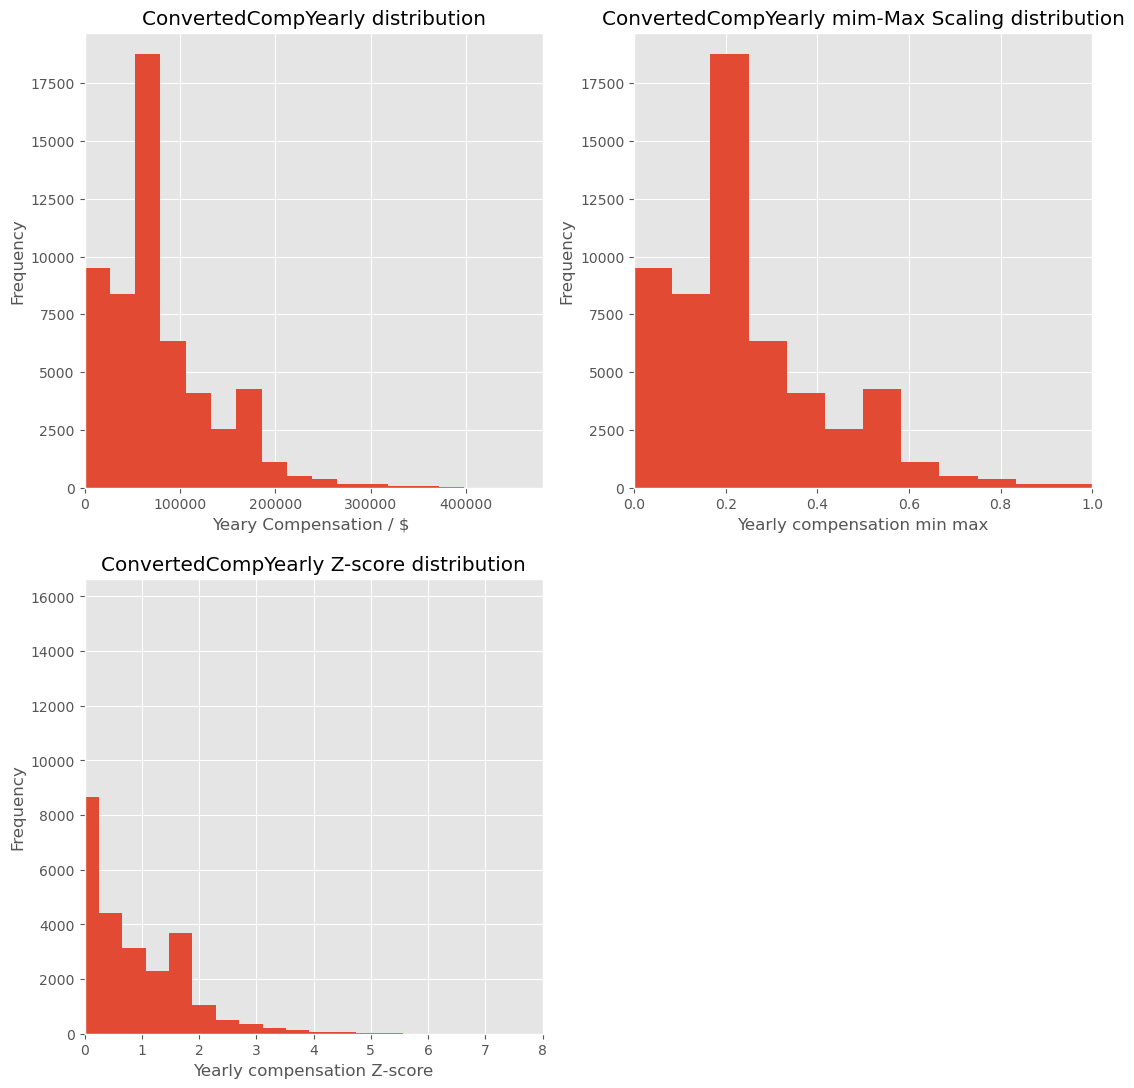

In [4]:
fig = plt.figure(figsize=(13, 13))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1 = df["ConvertedCompYearly"].plot(bins = 15,kind = "hist")
plt.title("ConvertedCompYearly distribution")
plt.xlim(0,480000)
plt.xlabel("Yeary Compensation / $ ")
# Add the first subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2 = df["ConvertedCompYearly_MinMax"].plot(bins = 15,kind = "hist")
plt.title("ConvertedCompYearly mim-Max Scaling distribution")
plt.xlim(0,1)
plt.xlabel("Yearly compensation min max")

# Add the first subplot (top-right)
ax3 = fig.add_subplot(2, 2, 3)
ax3 = df["ConvertedCompYearly_Zscore"].plot(bins = 17,kind = "hist")
plt.title("ConvertedCompYearly Z-score distribution")
plt.xlim(0,8)
plt.xlabel("Yearly compensation Z-score")
plt.show()

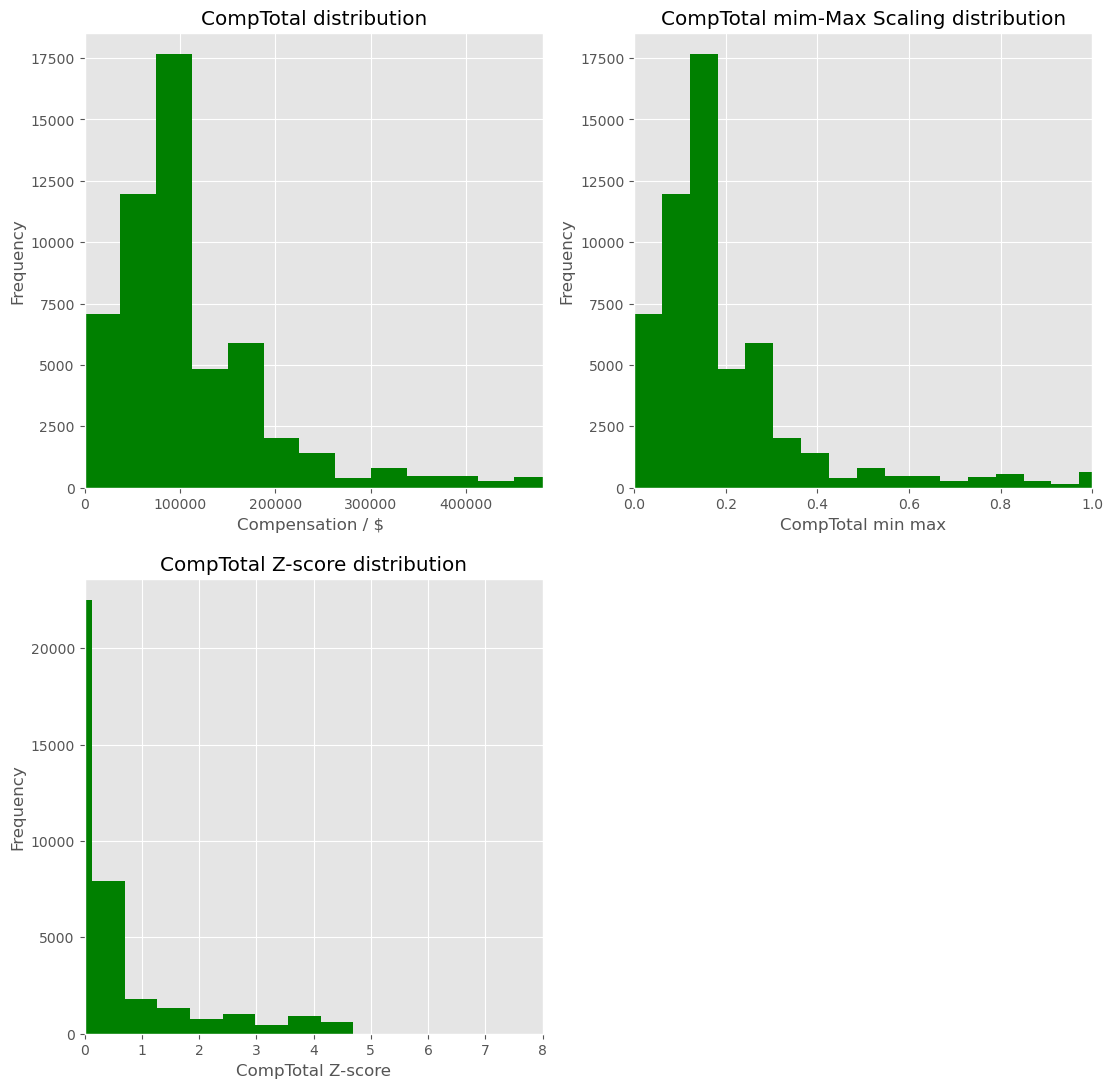

In [5]:
fig = plt.figure(figsize=(13, 13))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1 = df["CompTotal"].plot(bins = 20,kind = "hist", color = "green")
plt.title("CompTotal distribution")
plt.xlim(0,480000)
plt.xlabel("Compensation / $ ")
# Add the first subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2 = df["CompTotal_MinMax"].plot(bins = 20,kind = "hist", color = "green")
plt.title("CompTotal mim-Max Scaling distribution")
plt.xlim(0,1)
plt.xlabel("CompTotal min max")

# Add the first subplot (top-right)
ax3 = fig.add_subplot(2, 2, 3)
ax3 = df["CompTotal_Zscore"].plot(bins = 10,kind = "hist", color = "green")
plt.title("CompTotal Z-score distribution")
plt.xlim(0,8)
plt.xlabel("CompTotal Z-score")
plt.show()

For both plots min max scaling seems to be very similar to the original distribution. This was exepcted, as the distribution of compensation are generally heavily skewed and this dataset is no exception. We need to also keep in mind the large amount of missing values these columns had and handling them we might have created some bias in the process.

We now investigate correlations with other relevant variables.

In [6]:
pearson_coeff, pvalue = scipy.stats.pearsonr(x = df["CompTotal_MinMax"], y = df["ConvertedCompYearly_MinMax"])
print(f"The correlation coefficient between the variables CompTotal_MinMax and ConvertedCompYearly_MinMax is {pearson_coeff} and the p value is {pvalue}")


The correlation coefficient between the variables CompTotal_MinMax and ConvertedCompYearly_MinMax is 0.15344452804920294 and the p value is 3.729397130165407e-294


Interestingly the two variables have basically no correlation, so we will have to use both to investigate other variables. This might indicate a systematic error in how the data was collected. Also, as mentioned earlier, a great amount of values - nearly 50%, where missing in the first place.

In [7]:
pearson_coeff, pvalue = scipy.stats.pearsonr(x = df["CompTotal_MinMax"], y = df["JobSat_Mean"])
print(f"The correlation coefficient between the variables CompTotal_MinMax and JobSat_Mean is {pearson_coeff} and the p value is {pvalue}")

pearson_coeff, pvalue = scipy.stats.pearsonr(x = df["CompTotal_MinMax"], y = df["JobSat"])
print(f"The correlation coefficient between the variables CompTotal_MinMax and JobSat is {pearson_coeff} and the p value is {pvalue}")


The correlation coefficient between the variables CompTotal_MinMax and JobSat_Mean is 0.038157677539854516 and the p value is 1.25103148084074e-19
The correlation coefficient between the variables CompTotal_MinMax and JobSat is 0.027137398418020566 and the p value is 1.1523792494424613e-10


In [8]:
pearson_coeff, pvalue = scipy.stats.pearsonr(x = df["ConvertedCompYearly_MinMax"], y = df["JobSat_Mean"])
print(f"The correlation coefficient between the variables ConvertedCompYearly_MinMax and JobSat_Mean is {pearson_coeff} and the p value is {pvalue}")

pearson_coeff, pvalue = scipy.stats.pearsonr(x = df["ConvertedCompYearly_MinMax"], y = df["JobSat"])
print(f"The correlation coefficient between the variables ConvertedCompYearly_MinMax and JobSat is {pearson_coeff} and the p value is {pvalue}")


The correlation coefficient between the variables ConvertedCompYearly_MinMax and JobSat_Mean is -0.10990696716156785 and the p value is 4.6302277263306486e-151
The correlation coefficient between the variables ConvertedCompYearly_MinMax and JobSat is 0.15555452379346152 and the p value is 2.4358771317902136e-302


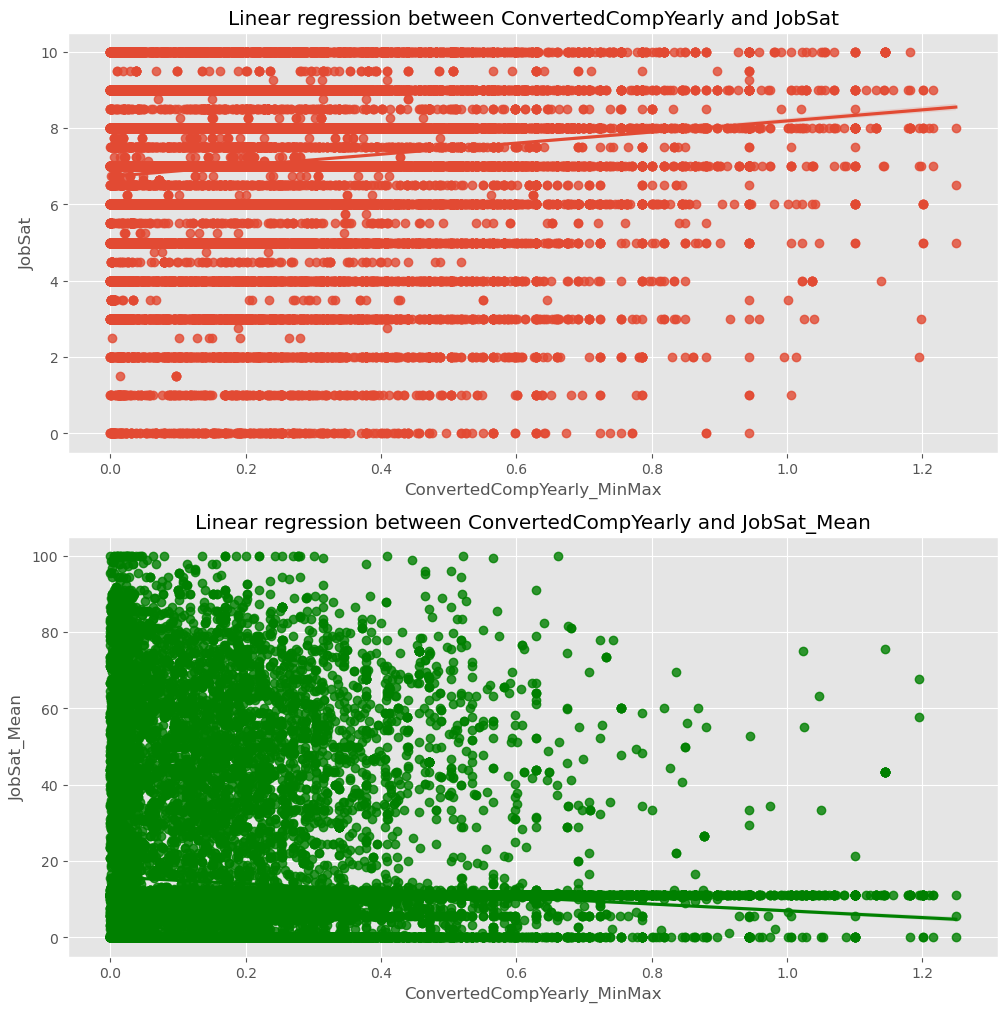

In [9]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 1, 1)
sns.regplot(data = df, x = "ConvertedCompYearly_MinMax", y = "JobSat", ax= ax1)
plt.title("Linear regression between ConvertedCompYearly and JobSat")

ax2 = fig.add_subplot(2, 1, 2)
sns.regplot(data = df, x = "ConvertedCompYearly_MinMax", y = "JobSat_Mean", ax= ax2, color= "green")
plt.title("Linear regression between ConvertedCompYearly and JobSat_Mean")
plt.show()

For this dataset, we cannot draw any conclusion about a clear relationship between job satisfaction and compensation. There seem to be some weak correlations that are not random, but possibly many other variables come to play in determining the job satisfaction. We will explore now the overall job satisfaction in the dataset now.

### JobSat and JobSat_Mean

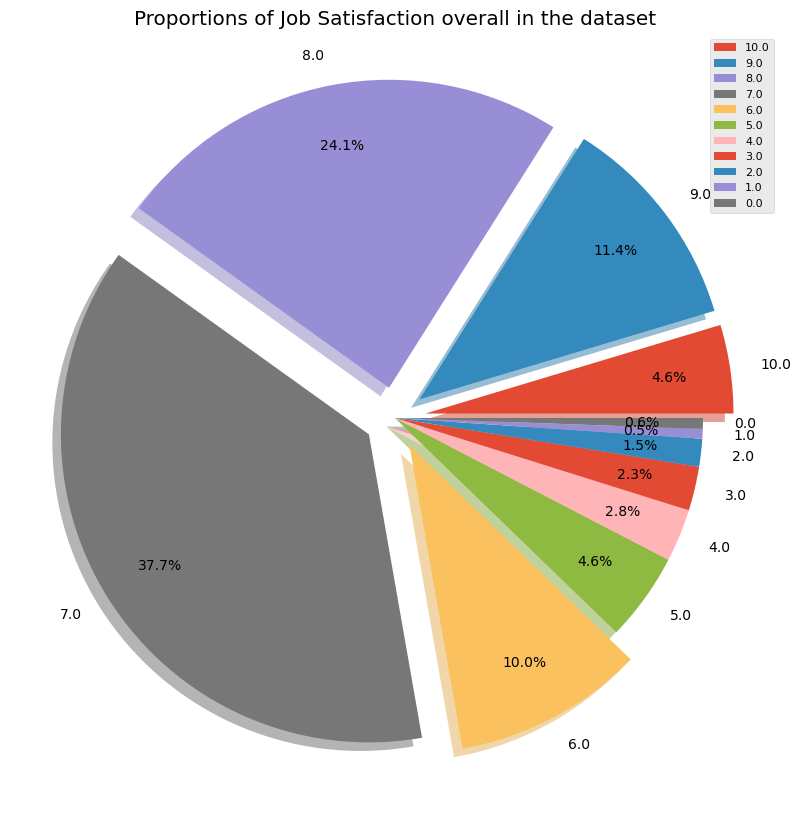

In [10]:
JobSat_count = np.round(df["JobSat"]).value_counts().sort_index(ascending= False)
JobSat_count.plot(kind = "pie", figsize = (10,10),
                 autopct='%1.1f%%', pctdistance= 0.8,
                 explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0),
                 shadow={'ox': -0.02, 'edgecolor': 'none', 'shade' : 0.1})

plt.legend(labels=JobSat_count.index, loc='upper right',fontsize=8) 
plt.title("Proportions of Job Satisfaction overall in the dataset")
plt.ylabel("")
plt.show()

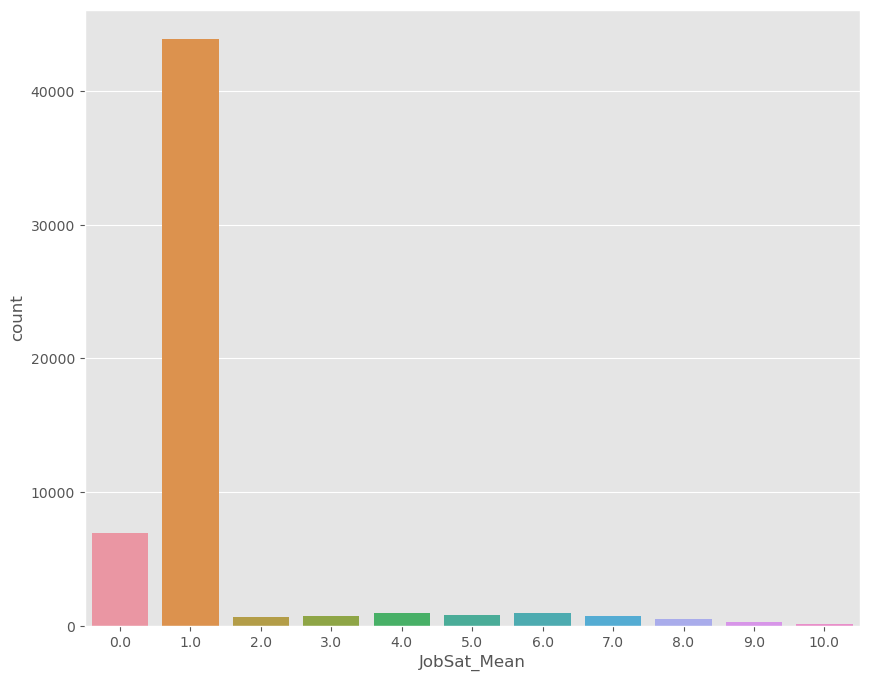

In [11]:
fig = plt.figure(figsize=(10, 8))
JobSat_Mean_binned = np.round(df["JobSat_Mean"]/10).to_frame() # We scale down 1-10 and round like we did previously before plotting
sns.countplot(data = JobSat_Mean_binned, x = "JobSat_Mean")
plt.show("Count plot for JobSat_Mean binned")
plt.show()

We can see that the column JobSat_Mean is not very meaningful here, and that probably explains the negative correlation we saw earlier. The data is just an average of scores of different questions, which for the most part were missing values. Hence we can ignore this value for the purpose of this analysis from now on.

## Analyzing remote work and preferences by job role

We will now briefely focus on remote work data and relationship between work type and job roles. First we check how the data is distributed relative to remote work.

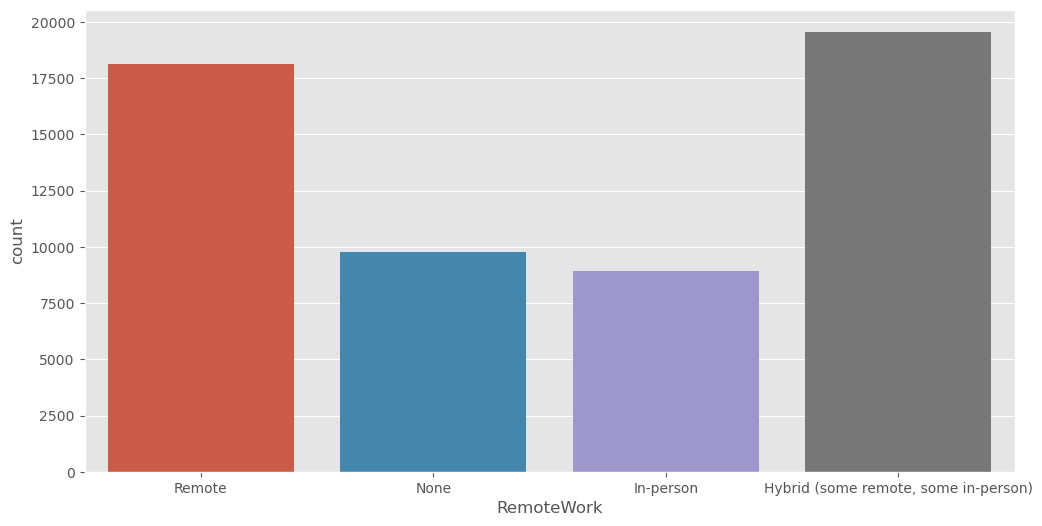

In [12]:
fig = plt.figure(figsize=(12,6)) # create figure
sns.countplot(data = df, x = "RemoteWork")
plt.show()

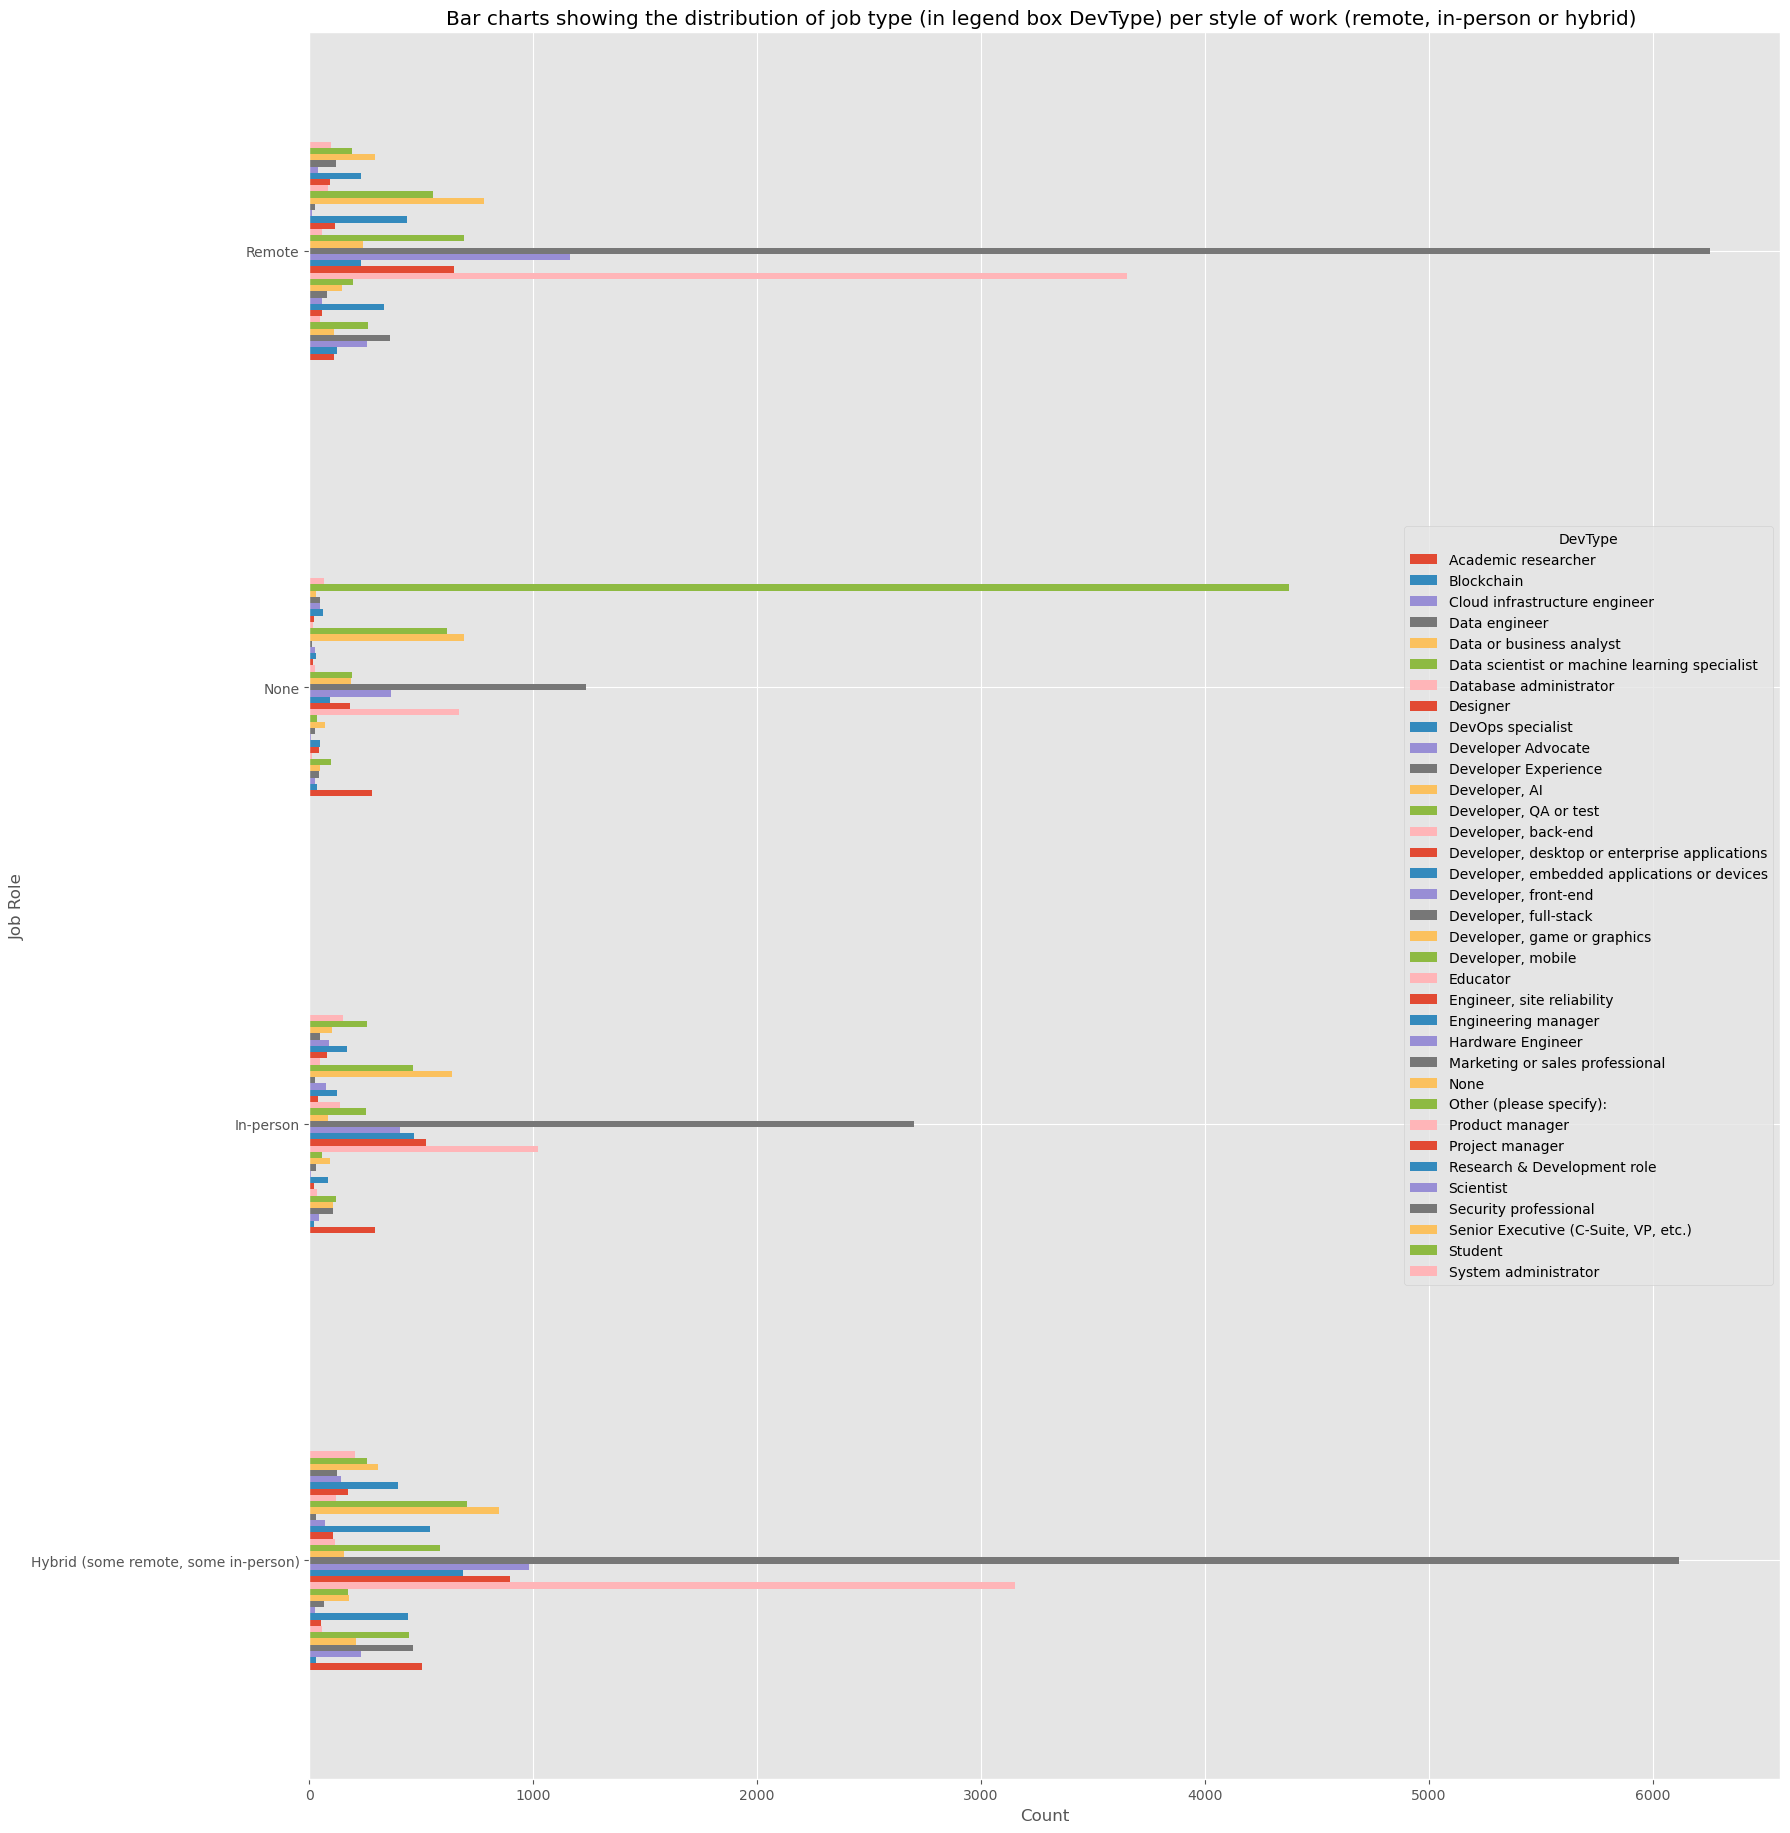

In [13]:
remote_by_role = pd.crosstab(index = df["RemoteWork"], columns = df["DevType"])
remote_by_role.plot(kind = "barh", figsize = (18,18))
plt.tight_layout()
plt.title("Bar charts showing the distribution of job type (in legend box DevType) per style of work (remote, in-person or hybrid) ")
plt.ylabel("Job Role")
plt.xlabel("Count")
plt.show()

We can probably see that the style of work doesn't affect most jobs types, especially full-stack, back-end and front-end developer that seem to have larger preference to work from hybrid or fully remote compared to other job roles.

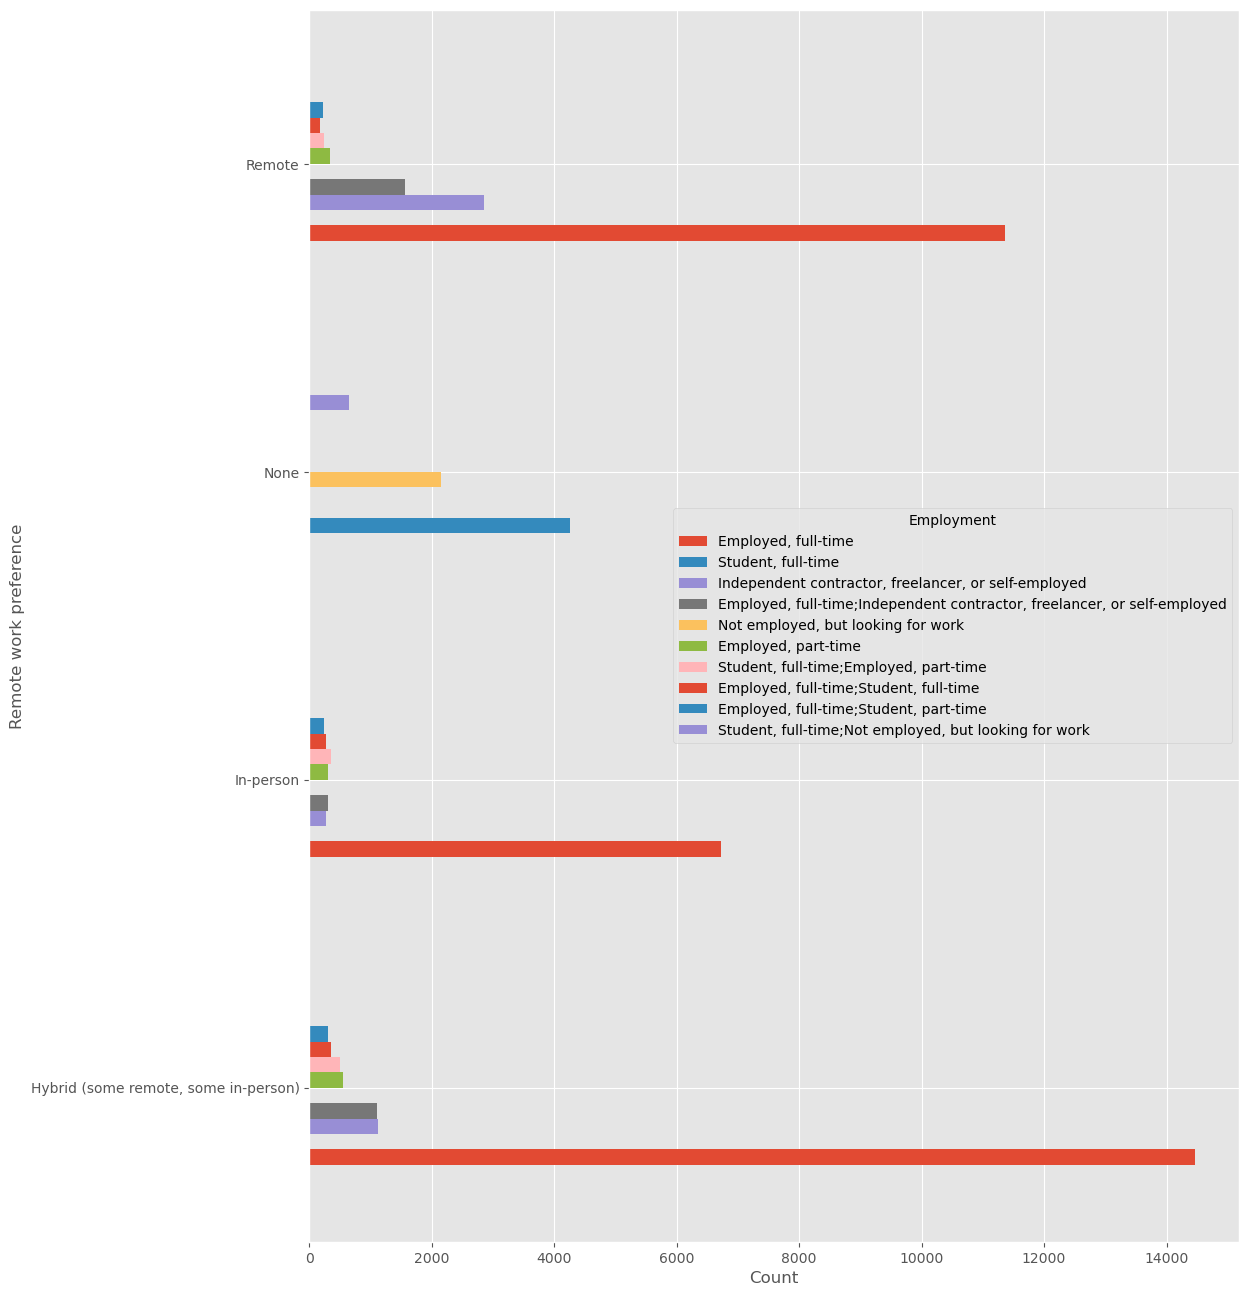

In [14]:
top_employment = df["Employment"].value_counts().head(10).index
remote_by_role = pd.crosstab(index = df["RemoteWork"], columns = df["Employment"])


valid_employment = top_employment.intersection(remote_by_role.columns)
remote_by_role_top = remote_by_role[valid_employment]
remote_by_role_top.plot(kind = "barh", figsize = (12,16))
plt.ylabel("Remote work preference")
plt.xlabel("Count")
#plt.tight_layout()
plt.show()

Full-time workers seem to have the largest preference for hybrid work type and in person compared to other job roles that seem to have higher prevalence of fully remote work.

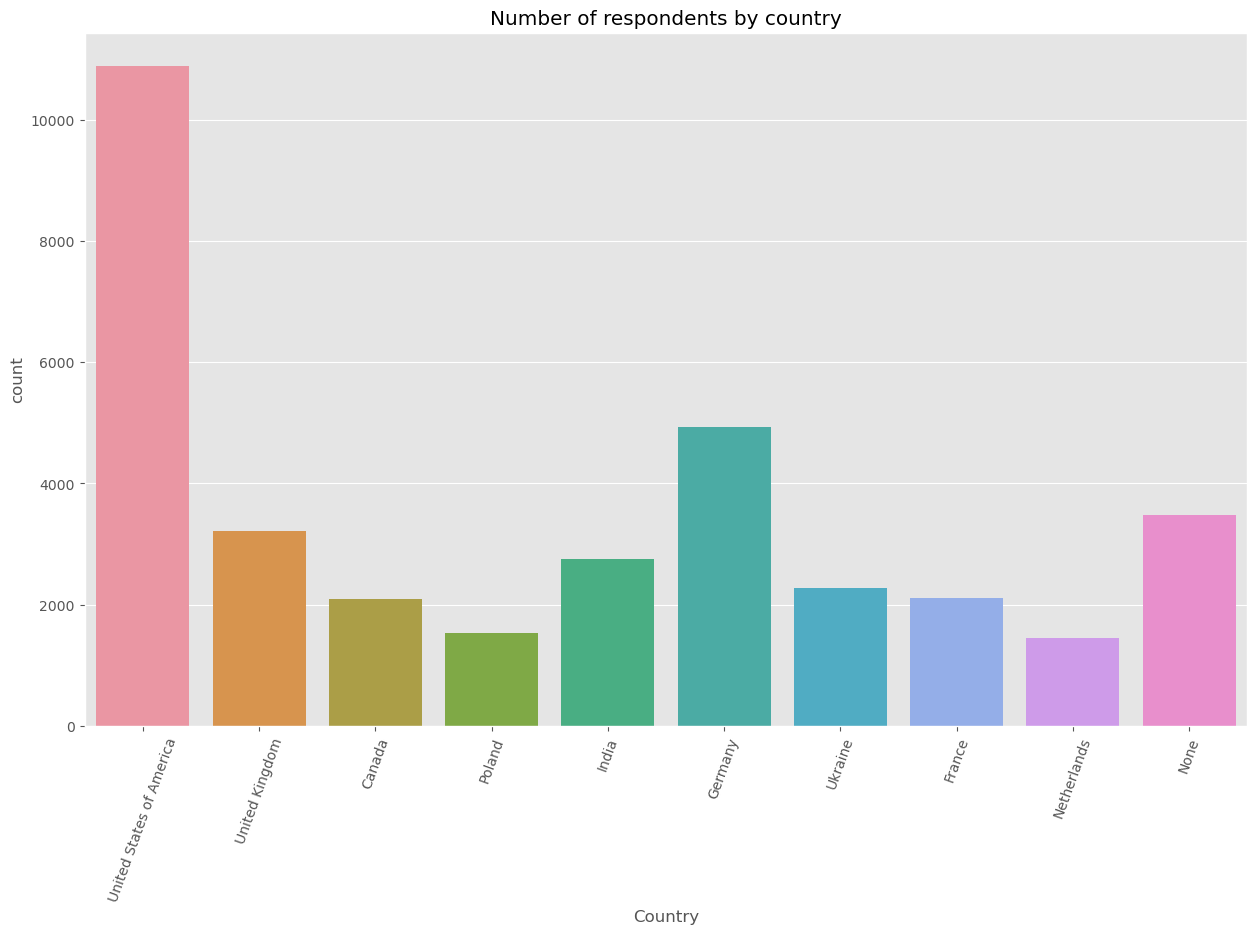

In [15]:
top_countries = df[df["Country"].isin(df["Country"].value_counts()[:10].index)]
fig = plt.figure(figsize=(15,9))
sns.countplot(data = top_countries, x = "Country")
plt.xticks(rotation = 70)
plt.title("Number of respondents by country")
plt.show()

The dataset is heavily biased towards United States market. We check how many countries are present though.

In [16]:
print("The total number of countries present in the dataset is: ",len(df["Country"].unique()))

The total number of countries present in the dataset is:  184


## Investigate the dataset and age group

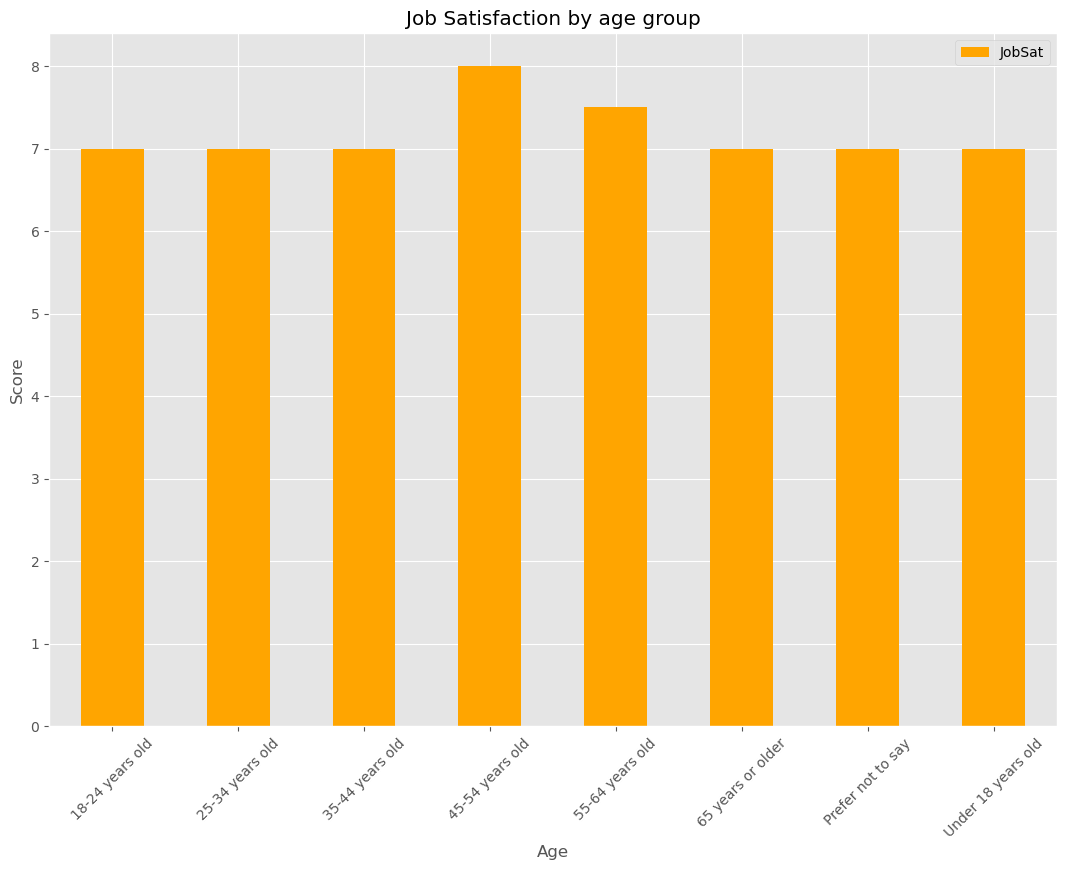

In [17]:
job_sat = df[["Age", "JobSat"]]
job_sat = job_sat.groupby("Age")[["JobSat"]].median()
job_sat.plot(kind = "bar", figsize = (13,9), color = "orange")
plt.title("Job Satisfaction by age group")
plt.ylabel("Score")
plt.xticks(rotation = 45)
plt.show()

In [18]:
# Let's save this dataframe after we applied the normalization here

df.to_csv("survey-data_normalized.csv")

# Conclusions

As we have seen, we cannot draw many conclusions about the relationship between job satisfaction and compensation using this dataset. Overall participants seem to be pretty happy about the role in general regardless of compensation and age. Full-time employees, especially for jobs that are not purely developers seem to stil have a high amount of people that work in person, rather than fully remote.